In [4]:
import os 
ANILINE =-139.0771291
ZINC101 =  -22154.50684605
ANILINE_ZINC = ANILINE + ZINC101
(-22293.60397996  -ANILINE_ZINC)  * 2625.49884478051
# (-22293.63451149 -ANILINE_ZINC)  * 2625.49884478051
## LEAN
# (-22293.63451149 -ANILINE_ZINC)  * 2625.49884478051
(-22293.64213159 -ANILINE_ZINC)  * 2625.49884478051

-152.68966604118603

C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_24308\1676908068.py:60: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_24308\1676908068.py:60: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_24308\1676908068.py:60: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_24308\1676908068.py:60: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_24308\1676908068.py:60: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_24308\1676908068.py:60: UserWarning: Glyph 48143 (\N{HANGU

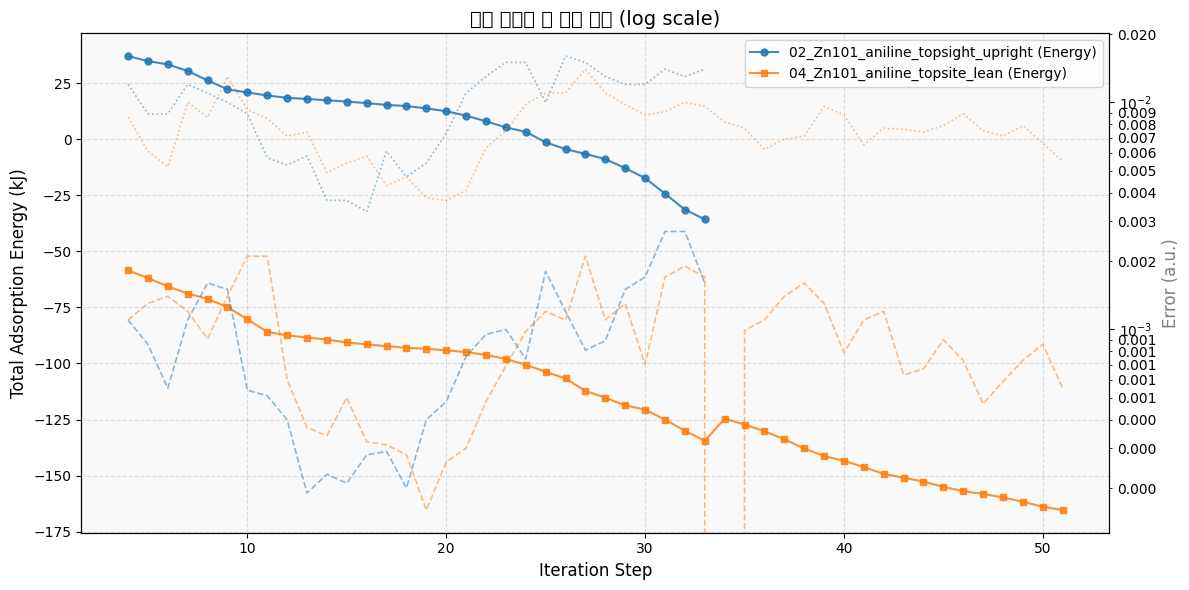

In [5]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, ScalarFormatter

# 스타일 적용
plt.style.use("seaborn-v0_8-muted")

ANILINE = -139.0771291
ZINC101 = -22154.50684605
ANILINE_ZINC = ANILINE + ZINC101

colors = plt.cm.tab10.colors
markers = ['o', 's', '^', 'D', 'P', '*', 'X', '<', 'v', '>']  # 최대 10종류

dirs = [x for x in os.listdir() if os.path.isdir(x)]

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

for idx, d in enumerate(dirs):
    csv_files = [x for x in os.listdir(d) if x.endswith(".csv")]
    if not csv_files:
        continue
    
    df = pd.read_csv(os.path.join(d, csv_files[0]))
    df["ad_energy_kj"] = (df["energy"] - ANILINE_ZINC) * 2625.49884478051
    df = df.iloc[4:]
    color = colors[idx % len(colors)]
    marker = markers[idx % len(markers)]

    # 에너지 (좌측 축)
    ax1.plot(df.index, df["ad_energy_kj"], label=f"{d} (Energy)", color=color,
             marker=marker, markersize=5, linewidth=1.5, alpha=0.85)

    # 에너지 에러 (우측 축, 실선)
    ax2.plot(df.index, df["energy_error"], color=color, linestyle='--', linewidth=1.2, alpha=0.5)

    # 그래디언트 에러 (우측 축, 점선)
    ax2.plot(df.index, df["gradient_error"], color=color, linestyle=':', linewidth=1.2, alpha=0.5)

# y축 설정
ax1.set_xlabel("Iteration Step", fontsize=12)
ax1.set_ylabel("Total Adsorption Energy (kJ)", fontsize=12, color='black')
ax2.set_ylabel("Error (a.u.)", fontsize=12, color='gray')

ax2.set_yscale("log")
ax2.yaxis.set_major_locator(LogLocator(base=10.0))
ax2.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))
ax2.yaxis.set_minor_formatter(ScalarFormatter())

# 시각적 요소
ax1.set_facecolor("#f9f9f9")
ax1.grid(True, linestyle='--', alpha=0.4)

# 범례 개선
ax1.legend(loc="upper right", fontsize=10, frameon=True, bbox_to_anchor=(1.0, 1.0))

plt.title("흡착 에너지 및 에러 변화 (log scale)", fontsize=14)
plt.tight_layout()
plt.show()


In [13]:
df

,Unnamed: 0,index,energy,energy_error,gradient_error,ad_energy_kj
4,4,4,-22293.606231,0.00110,0.0086,-58.433181
5,5,5,-22293.607552,0.00130,0.0061,-61.901990
6,6,6,-22293.608961,0.00140,0.0052,-65.600793
7,7,7,-22293.610182,0.00120,0.0100,-68.806212
8,8,8,-22293.611087,0.00091,0.0086,-71.183024
9,9,9,-22293.612488,0.00140,0.0130,-74.859273
10,10,10,-22293.614546,0.00210,0.0093,-80.263574
11,11,11,-22293.616685,0.00210,0.0085,-85.878938
12,12,12,-22293.617282,0.00060,0.0071,-87.445993
13,13,13,-22293.617650,0.00037,0.0074,-88.412125


In [9]:
csv_files = [x for x in os.listdir(dirs[0]) if x.endswith(".csv")]
df = pd.read_csv(os.path.join(dirs[0], csv_files[0]))
df["ad_energy_kj"] = (df["energy"] - ANILINE_ZINC) * 2625.49884478051
df = df.iloc[4:]
df

,Unnamed: 0,index,energy,energy_error,gradient_error,ad_energy_kj
4,4,4,-22293.569822,0.00110,0.0120,37.158029
5,5,5,-22293.570686,0.00086,0.0089,34.890097
6,6,6,-22293.571237,0.00055,0.0089,33.442895
7,7,7,-22293.572361,0.00110,0.0120,30.492885
8,8,8,-22293.573961,0.00160,0.0110,26.292559
9,9,9,-22293.575473,0.00150,0.0100,22.321545
10,10,10,-22293.576013,0.00054,0.0089,20.905850
11,11,11,-22293.576520,0.00051,0.0057,19.573015
12,12,12,-22293.576925,0.00040,0.0053,18.509846
13,13,13,-22293.577113,0.00019,0.0058,18.015307
